<a href="https://colab.research.google.com/github/maxprodigy/Water-Quality-Model-P18/blob/main/In%C3%A8s_IKIREZI_Water_Quality_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Load and Prepare the Dataset

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Load the dataset

In [2]:
df = pd.read_csv("/content/water_potability (1).csv")

# Handle missing values (fill with column means)

In [3]:
df.fillna(df.mean(), inplace=True)

# Define features (X) and target (y)

In [4]:
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Standardize features (important for neural networks)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train, validation, and test sets (70/15/15)

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check class balance

In [7]:
print("Class distribution in y_train:\n", y_train.value_counts())  # Check for imbalance

Class distribution in y_train:
 Potability
0    1381
1     912
Name: count, dtype: int64


# Step 2: Define the Model with L2 Regularization and SGD Optimizer

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD

# Function to create the model

In [9]:
def model_l2_sgd(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu', kernel_regularizer=l2(0.003)),  # L2 Regularization
        Dropout(0.25),  # Prevent overfitting
        Dense(32, activation='relu', kernel_regularizer=l2(0.003)),
        Dropout(0.25),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9),  # SGD Optimizer
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Get input dimension from data

In [10]:
input_dim = X_train.shape[1]
print(f"Creating L2-SGD model with input dimension: {input_dim}")

Creating L2-SGD model with input dimension: 9


# Initialize the model

In [11]:
model_l2 = model_l2_sgd(input_dim)

# Step 3: Train the Model with Early Stopping

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Early Stopping to prevent unnecessary training

In [13]:
es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   restore_best_weights=True)


# Train the model

In [14]:
history_l2 = model_l2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    verbose=1,
    callbacks=[es]
)


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5450 - loss: 0.8713 - val_accuracy: 0.5866 - val_loss: 0.8565
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5513 - loss: 0.8777 - val_accuracy: 0.6110 - val_loss: 0.8513
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5571 - loss: 0.8665 - val_accuracy: 0.6029 - val_loss: 0.8473
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5600 - loss: 0.8721 - val_accuracy: 0.6171 - val_loss: 0.8438
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5728 - loss: 0.8617 - val_accuracy: 0.6273 - val_loss: 0.8406
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5941 - loss: 0.8527 - val_accuracy: 0.6375 - val_loss: 0.8376
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6134 - loss: 0.8452 - val_accuracy: 0.6395 - val_loss: 0.8358
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5743 - loss: 0.8549 - val_accuracy: 0.

# Step 4: Evaluate Model Performance

In [15]:
train_loss_l2, train_acc_l2 = model_l2.evaluate(X_train, y_train, verbose=0)
test_loss_l2, test_acc_l2 = model_l2.evaluate(X_test, y_test, verbose=0)

# Print accuracy results for comparison

In [16]:
print(f"\nL2-SGD Train Accuracy: {train_acc_l2:.4f} | Train Loss: {train_loss_l2:.4f}")
print(f"L2-SGD Test Accuracy: {test_acc_l2:.4f} | Test Loss: {test_loss_l2:.4f}")


L2-SGD Train Accuracy: 0.6808 | Train Loss: 0.7326
L2-SGD Test Accuracy: 0.6890 | Test Loss: 0.7285


# Step 5: Visualize Training History

# Plot Training Loss

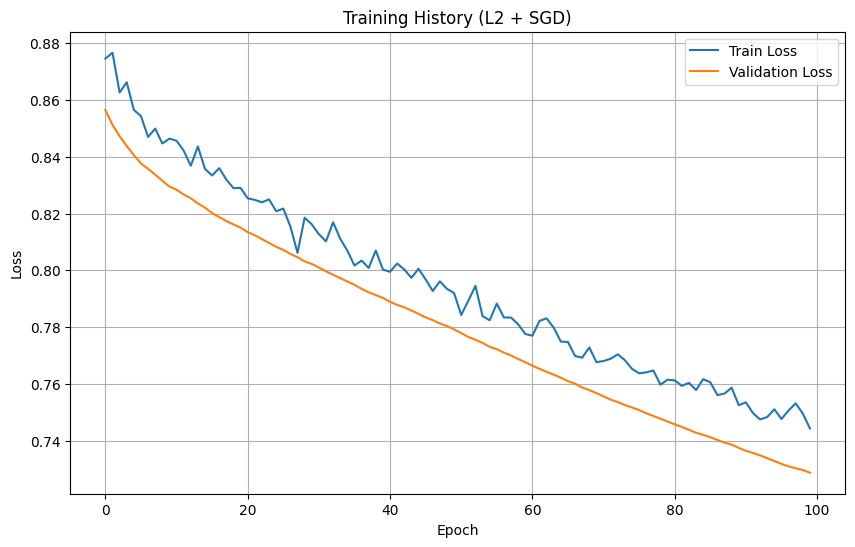

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(history_l2.history['loss'], label='Train Loss')
plt.plot(history_l2.history['val_loss'], label='Validation Loss')
plt.title('Training History (L2 + SGD)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy

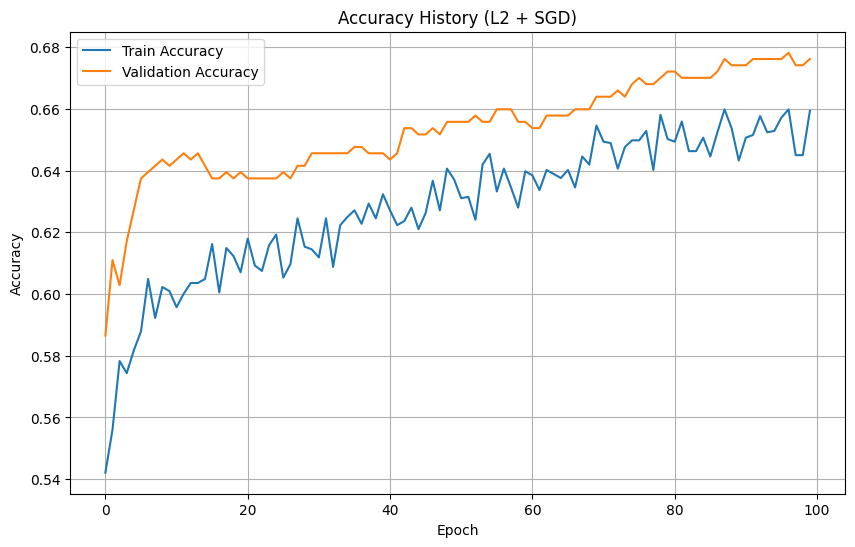

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(history_l2.history['accuracy'], label='Train Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy History (L2 + SGD)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Generate Confusion Matrix and Classification Report

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on test data

In [20]:
y_pred = (model_l2.predict(X_test) > 0.5).astype("int32")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


# Generate Confusion Matrix

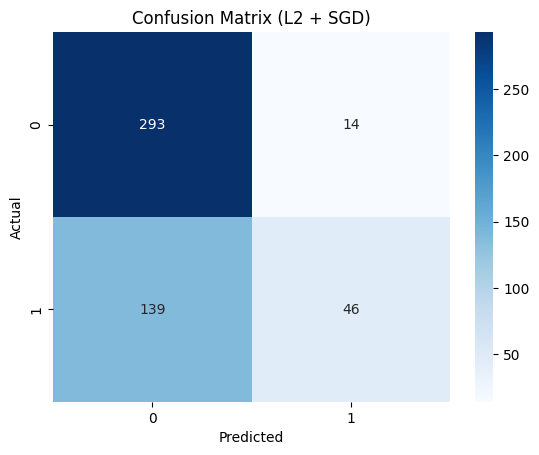

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (L2 + SGD)")
plt.show()

# Classification Report

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.95      0.79       307
           1       0.77      0.25      0.38       185

    accuracy                           0.69       492
   macro avg       0.72      0.60      0.58       492
weighted avg       0.71      0.69      0.64       492

